# Trafic Light Classificator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline
fig = plt.figure()


In [10]:
file = cv2.imread('sim_images/frame000000.png')
#new_file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);


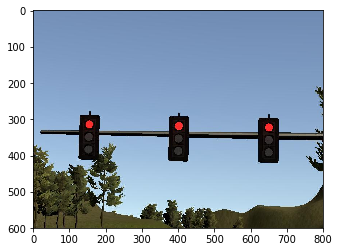

In [12]:
#plt.imshow(file)
#file

## 1. Data Import

In [22]:
X_train = []
x_label = []
for img_class, directory in enumerate(['sim_red_Crop', 'sim_yellow_Crop', 'sim_green_Crop', 'none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)
        #file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,32))

        X_train.append(resized/255.-0.5)
        x_label.append(img_class)
        
        #if (i < 3):
        #    plt.imshow(rgb)
        #    plt.show()
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [5]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

## 2. CNN

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [24]:
categorical_labels = to_categorical(x_label)

In [9]:
# num_classes = 4
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Flatten())

# #model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(num_classes, activation='softmax'))

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))

In [26]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [27]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [28]:
model.fit(X_train, categorical_labels, batch_size=32, epochs=30, verbose=True, validation_split=0.1, shuffle=True)

Train on 203 samples, validate on 23 samples
Epoch 1/30
203/203 [==============================] - 0s - loss: 0.8809 - acc: 0.6700 - val_loss: 0.1675 - val_acc: 1.0000
Epoch 2/30
203/203 [==============================] - 0s - loss: 0.2978 - acc: 0.9360 - val_loss: 0.0411 - val_acc: 1.0000
Epoch 3/30
203/203 [==============================] - 0s - loss: 0.1250 - acc: 0.9852 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 4/30
203/203 [==============================] - 0s - loss: 0.0611 - acc: 0.9951 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 5/30
203/203 [==============================] - 0s - loss: 0.0331 - acc: 1.0000 - val_loss: 9.2034e-04 - val_acc: 1.0000
Epoch 6/30
203/203 [==============================] - 0s - loss: 0.0201 - acc: 1.0000 - val_loss: 4.9144e-04 - val_acc: 1.0000
Epoch 7/30
203/203 [==============================] - 0s - loss: 0.0146 - acc: 1.0000 - val_loss: 3.3753e-04 - val_acc: 1.0000
Epoch 8/30
203/203 [==============================] - 0s - loss: 0.0103 - acc: 1.0

In [29]:
score = model.evaluate(X_train, categorical_labels, verbose=0)

In [30]:
print(score)

[0.0010281791720903515, 1.0]


In [31]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

 32/226 [===>..........................] - ETA: 0s0 [9.9806851e-01 2.9842515e-06 1.8327524e-03 9.5744137e-05] [1. 0. 0. 0.]
1 [9.9806589e-01 2.9889147e-06 1.8354098e-03 9.5760864e-05] [1. 0. 0. 0.]
2 [9.9959356e-01 7.9150772e-07 3.6751459e-04 3.8210990e-05] [1. 0. 0. 0.]
3 [9.9959356e-01 7.9150772e-07 3.6751459e-04 3.8210990e-05] [1. 0. 0. 0.]
4 [9.9806851e-01 2.9842515e-06 1.8327524e-03 9.5744137e-05] [1. 0. 0. 0.]
5 [9.9959356e-01 7.9150772e-07 3.6751459e-04 3.8210990e-05] [1. 0. 0. 0.]
6 [9.9806851e-01 2.9842515e-06 1.8327524e-03 9.5744137e-05] [1. 0. 0. 0.]
7 [9.9806851e-01 2.9842515e-06 1.8327524e-03 9.5744137e-05] [1. 0. 0. 0.]
8 [9.9806172e-01 2.9908242e-06 1.8393708e-03 9.5935611e-05] [1. 0. 0. 0.]
9 [9.9959379e-01 7.9449512e-07 3.6720658e-04 3.8177557e-05] [1. 0. 0. 0.]
10 [9.9806172e-01 2.9908242e-06 1.8393708e-03 9.5935611e-05] [1. 0. 0. 0.]
11 [9.9806851e-01 2.9842515e-06 1.8327524e-03 9.5744137e-05] [1. 0. 0. 0.]
12 [9.9806172e-01 2.9908242e-06 1.8393708e-03 9.5935611e-05]

143 [8.5414313e-06 1.0172132e-02 9.8924726e-01 5.7215901e-04] [0. 0. 1. 0.]
144 [5.7689849e-06 4.5934133e-03 9.9505371e-01 3.4707639e-04] [0. 0. 1. 0.]
145 [2.5067027e-05 1.0777345e-06 9.9993014e-01 4.3754630e-05] [0. 0. 1. 0.]
146 [3.0742624e-06 1.1086345e-05 9.9995542e-01 3.0392448e-05] [0. 0. 1. 0.]
147 [3.1620657e-06 1.1130354e-05 9.9995577e-01 2.9835557e-05] [0. 0. 1. 0.]
148 [2.4807834e-05 1.0737961e-06 9.9993038e-01 4.3782937e-05] [0. 0. 1. 0.]
149 [3.15352804e-06 1.11404115e-05 9.99954820e-01 3.09948227e-05] [0. 0. 1. 0.]
150 [6.2278468e-06 4.9479888e-03 9.9469721e-01 3.4845446e-04] [0. 0. 1. 0.]
151 [6.8718123e-07 1.9265262e-07 6.2637702e-07 9.9999845e-01] [0. 0. 0. 1.]
152 [9.3427047e-08 1.6322872e-08 8.3582627e-08 9.9999988e-01] [0. 0. 0. 1.]
153 [2.2212451e-07 4.8228248e-08 1.9262143e-07 9.9999964e-01] [0. 0. 0. 1.]
154 [1.0234858e-07 2.2594813e-08 2.8671730e-07 9.9999964e-01] [0. 0. 0. 1.]
155 [1.26498335e-05 4.23741199e-07 2.27094438e-06 9.99984622e-01] [0. 0. 0. 1.]
156 

In [32]:
plt.imshow(X_train[0])

ValueError: Floating point image RGB values must be in the 0..1 range.

In [17]:
import h5py
model.save('classifier_sim.h5')

In [20]:
file = cv2.imread('sim_red_Crop/frame000000.jpg')
#file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
file.shape
resized = cv2.resize(file, (32,32))
resized = resized/255.0-0.5
prediction = model.predict(resized.reshape((1, 32, 32, 3)))
prediction
#plt.imshow(file)

array([[4.5946765e-01, 6.2704406e-05, 7.8660686e-04, 5.3968304e-01]],
      dtype=float32)